# 1 Multi-class Classication

## 1.1 Dataset

In [1]:
import numpy as np
from scipy.io import loadmat

In [2]:
#loading dataset
data = loadmat('ex3data1.mat')

In [3]:
X = data['X']

In [4]:
X.shape

(5000, 400)

In [14]:
y = data['y']

In [15]:
#the '0' digit labeled as '10', while the digits '1' to '9' are labeled as '1' to '9'.
y.shape

(5000, 1)

In [16]:
#np.where(y == 10)

## 1.2 Visualizing the data

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as img

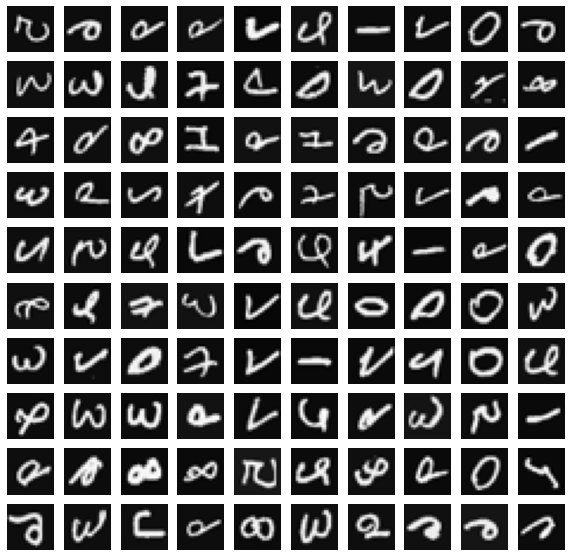

In [18]:
#display images
fig, axis = plt.subplots(10, 10, figsize=(10, 10))
for i in range(0, 10):
    for j in range(0, 10):
        #display 100 random images(reshape 400-dimensional vector to 20x20 matrix)
        axis[i, j].imshow(X[np.random.randint(0, 5000)].reshape(20, 20), cmap='gray')
        #turn of the axis values
        axis[i, j].axis("off")

## 1.3 Vectorizing Logistic Regression

### 1.3.1 Vectorizing the regularized cost function

In [19]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

In [20]:
def costFunction(theta, X, y, lamb):
    m = len(y)
    J = 0
    
    #compute z
    z = np.dot(X, theta.reshape(X.shape[1], 1))
    #compute cost
    J = (1 / m) * np.sum(-y*np.log(sigmoid(z)) - (1 - y)*np.log(1 - sigmoid(z))) + (lamb / (2 * m)) * np.sum(np.square(theta[1:]))
    
    return J

### 1.3.2 Vectorizing the regularized gradient

In [21]:
def Gradient(theta, X, y, lamb):
    m = len(y)
    
    #compute z
    z = np.dot(X, theta.reshape(X.shape[1], 1))
    #compute gradient for theta 0
    theta0 = (1 / m) * np.dot(X[:, 0], (sigmoid(z) - y))
    #compute the rest of theta
    reg_theta = (1 / m) * np.dot(X[:, 1:].transpose(), (sigmoid(z) - y)) + (lamb / m) * theta[1:].reshape(X.shape[1] - 1, 1)
    
    reg_theta = np.append(np.array([[theta0.item()]]), reg_theta, axis=0)
    
    return reg_theta.flatten()

In [22]:
print('Testing costFunction() with regularization')

theta_t = np.array([-2, -1, 1, 2])
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).transpose()
X_t = np.append(np.ones((5,1)), X_t, axis=1)
y_t = np.array([1,0,1,0,1]).reshape(5,1)
lambda_t = 3
J = costFunction(theta_t, X_t, y_t, lambda_t)
grad = Gradient(theta_t, X_t, y_t, lambda_t)

print('Cost: ', J)
print('Expected cost: 2.534819')
print('Gradients:', grad)
print('Expected gradients: \n');
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')

Testing costFunction() with regularization
Cost:  2.534819396109744
Expected cost: 2.534819
Gradients: [ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients: 

 0.146561
 -0.548558
 0.724722
 1.398003



## 1.4 One-vs-all Classication

In [23]:
import scipy.optimize as op

In [24]:
def oneVsAll(X, y, num_labels, lamb):
    #number of samples
    m = X.shape[0]
    #number of features
    n = X.shape[1]
    
    #all_theta is the matrix where each rows in this matrix corresponds to each label
    #we add one column in the matrix, this column is theta 0
    all_theta = np.zeros((num_labels, n + 1))
    
    #add ones to the X data matrix
    X = np.append(np.ones((m, 1)), X, axis=1)
    
    #set initial theta
    initial_theta = np.zeros((n + 1))
    
    for i in range(1, num_labels + 1):
        reg_optimization = op.minimize(fun=costFunction, x0=initial_theta, args=(X, np.where(y==i, 1, 0), lamb), method='CG', jac=Gradient, options={'maxiter': 50})
        all_theta[i - 1] = reg_optimization.x
        
    return all_theta

In [25]:
num_labels = 10
lamb = 0.1

In [26]:
all_theta = oneVsAll(X, y, num_labels, lamb)

In [27]:
all_theta.shape

(10, 401)

### 1.4.1 One-vs-all Prediction

In [28]:
def predictOneVsAll(all_theta, X):
    #the number of samples
    m = X.shape[0]
    #the number of labels
    num_labels = all_theta.shape[0]
    
    #Add ones to the X data matrix
    X = np.append(np.ones((m, 1)), X, axis=1)
                  
    predictions = np.dot(X, all_theta.transpose())
    
    #return predictions (find the max value in each row)
    return np.argmax(predictions, axis=1) + 1

In [29]:
predictions = predictOneVsAll(all_theta, X)

In [30]:
predictions.shape

(5000,)

In [31]:
print('Training Set Accuracy:', np.mean(y == predictions.reshape(y.shape))*100, '%')

Training Set Accuracy: 95.14 %


# 2 Neural Networks

## 2.1 Model representation

In [32]:
#load parameters
parameters = loadmat('ex3weights.mat')

In [33]:
parameters

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

In [34]:
theta1 = parameters['Theta1']
theta2 = parameters['Theta2']

In [35]:
theta1.shape

(25, 401)

In [36]:
theta2.shape

(10, 26)

## 2.2 Feedforward Propagation and Prediction

In [37]:
#Implement predict
def predictNeuronNetwork(theta1, theta2, X):
    #the number of samples
    m = X.shape[0]
    #the number of labels
    num_labels = theta2.shape[0]
    
    #Add ones to the data matrix X
    X = np.append(np.ones((m, 1)), X, axis=1)
    
    #Compute z2
    z2 = np.dot(X, theta1.transpose())
    #Compute a2
    a2 = sigmoid(z2)
    #Add ones to matrix a2
    a2 = np.append(np.ones((m, 1)), a2, axis=1) 
    
    #Compute z3
    z3 = np.dot(a2, theta2.transpose())
    #Compute a3
    a3 = sigmoid(z3)
    
    return np.argmax(a3, axis=1) + 1

In [38]:
predictNeuronNetwork(theta1, theta2, X)

array([10, 10, 10, ...,  9,  9,  9], dtype=int64)

In [39]:
nn_predictions = predictNeuronNetwork(theta1, theta2, X)

In [40]:
print('Training set Accuracy: ', np.mean(nn_predictions.reshape(y.shape) == y)*100, '%')

Training set Accuracy:  97.52 %


predict:  3


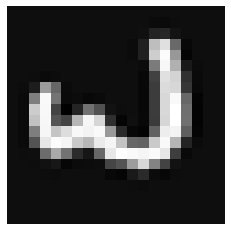

In [51]:
#testing
random_index = np.random.randint(0, 5000)
plt.imshow(X[random_index].reshape(20, 20), cmap='gray')
plt.axis("off")
print('predict: ', 0 if nn_predictions[random_index] == 10 else nn_predictions[random_index])